In [1]:
# imports
import math
import numpy as np
import pandas as pd
from scipy import stats
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
# import mayavi.mlab as mlab
import seaborn as sns

import sys
import json
import shutil

In [2]:
def load_parameters(filepath):
    '''
    Loads input and output directories
    '''
    with open(filepath) as fp:
        parameter = json.load(fp)

    return parameter

sys.path.insert(0, '../src')

In [3]:
# Seating_chart_builder

n = 28
seats = {str(i): 0 for i in range(n)}
seats_28 = seats.copy()
for key, val in seats.items():    
    if int(key)%4 == 0:
        x = int(7/2 * int(key) + 2)
        y = 3
            
    elif int(key)%4 == 1:
        x = int(7/2 * (int(key) - 1) + 2)
        y = 16
        
    elif int(key)%4 == 2:
        x = int(7/2 * int(key) + 2)
        y = 8
        
    else:
        x = int(7/2 * (int(key) - 1) + 2)
        y = 21
    seats_28[key] = [x, y]
    
n_ = 56
seats_ = {str(i): 0 for i in range(n_)}
seats_56 = seats_.copy()
for key, val in seats_.items():
    if int(key)%4 == 0:
        x = int(7 * int(key)/4 + 2)
        y = 3
            
    elif int(key)%4 == 1:
        x = int(7 * (int(key) - 1)/4 + 2)
        y = 16
        
    elif int(key)%4 == 2:
        x = int(7 * int(key)/4 -1)
        y = 8
        
    else:
        x = int(7 * (int(key) - 1)/4 -1)
        y = 21
    seats_56[key] = [x, y]
# ----------------------------------------------------------
f_seats = {str(i): [] for i in range(56)}
f_seats_28 = f_seats.copy()
for key, val in f_seats.items(): 
    if int(key)%4 == 0:
        x = math.floor(int(key)/2)  + math.floor(int(key)/6) + 1
        y = 1
            
    elif int(key)%4 == 1:
        x = math.floor(int(key)/2) + math.floor(int(key)/6) + 1
        y = 4
        
    elif int(key)%4 == 2:
        x = math.floor(int(key)/2) + math.floor(int(key)/6) + 1
        y = 2
        
    else:
        x = math.floor(int(key)/2) + math.floor(int(key)/6) + 1
        y = 5
    f_seats_28[key] = [x, y]
    
f_seats_ = {str(i): [] for i in range(n_)}
f_seats_56 = f_seats_.copy()
for key, val in f_seats_56.items():
    if int(key)%4 == 0:
        x = math.floor(int(key)/4)  + math.floor(int(key)/12) + 1
        y = 1
            
    elif int(key)%4 == 1:
        x = math.floor(int(key) - 1)/4  + math.floor((int(key) - 1)/12) + 1
        y = 4
        
    elif int(key)%4 == 2:
        x = math.floor(int(key)/4)  + math.floor(int(key)/12) + 1
        y = 2
        
    else:
        x = math.floor((int(key) -1)/4)  + math.floor((int(key) - 1)/12) + 1
        y = 5
    f_seats_56[key] = [int(x), int(y)]

In [4]:
# LOCAL IMPORT
# import data from other files
from bus import bus_sim
from classroom import func
from infection import generate_infectivity_curves, plot_infectivity_curves, return_aerosol_transmission_rate

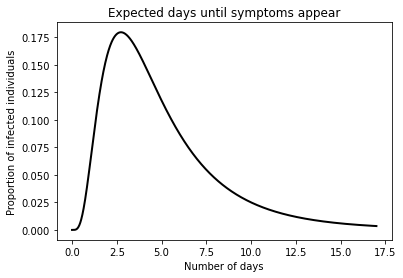

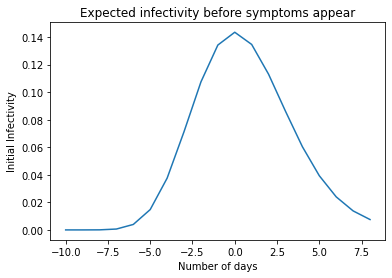

In [5]:
# INFECTION

# plot % infectivity based on day- lognormal w/ % chance of infectivity

proxy_vars = generate_infectivity_curves()
out = plot_infectivity_curves(proxy_vars)
# proxy_vars

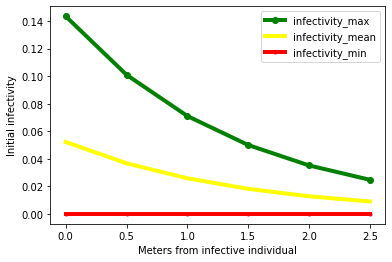

In [6]:
# print('max', max(out))
# print('min', min(out))
# print('mean', np.mean(out))
dist_plot_x = np.arange(0, 3, 0.5)
def chu(dist, inf):
    return (1 / (2.02 ** dist)) * inf
max_list = []
min_list = []
mean_list = []



for i in dist_plot_x:
    max_list.append(chu(i, max(out.gamma)))
    min_list.append(chu(i, min(out.gamma)))
    mean_list.append(chu(i, np.mean(out.gamma)))
    

df = pd.DataFrame({'meters': dist_plot_x, 'infectivity_max': max_list, 'infectivity_mean': mean_list, 'infectivity_min': min_list})

plt.plot('meters', 'infectivity_max', data=df, marker='o', color='green', linewidth=4)
plt.plot('meters', 'infectivity_mean', data=df, marker='', color='yellow', linewidth=4)
plt.plot('meters', 'infectivity_min', data=df, marker='.', color='red', linewidth=4)    
plt.legend()
plt.xlabel('Meters from infective individual')
plt.ylabel('Initial infectivity')


# plt.show() 
plt.savefig("distance_infective.png", dpi=300)
# replace with plt.savefig()

In [7]:
############ initialize variables

# setup default infection parameters
floor_area = 86.02  # ft2 # 11.4 m * 2.3 m * (m^2->ft^2) = 86.02 ~= 86 ft^2
mean_ceiling_height = 12  # ft # 1.85 m -> ft = 6.06 ~= 6 ft
air_exchange_rate = 20  # /hr (air changes per hour (ACH)) #moving bus mph average


##Assumed Parameter Identified as 0.2 for Classrooms, 1.0 for outdoors#
# and .5 for buses with windows open
primary_outdoor_air_fraction = 0.5  # 1.0 = natural ventilation
aerosol_filtration_eff = 0  # >0.9997 HEPA, =0.2-0.9 MERVs, =0 no filter

#Average daily RH for San Diego is 69%
relative_humidity = 0.69 
physical_params = [floor_area, mean_ceiling_height, air_exchange_rate, primary_outdoor_air_fraction,
                        aerosol_filtration_eff, relative_humidity]

# Physiological Parameters
breathing_flow_rate = 0.5  # m3/hr
max_aerosol_radius = 2  # micrometers
physio_params = [breathing_flow_rate, max_aerosol_radius]

# Disease Parameters
exhaled_air_inf = 30  # infection quanta/m3, changes with acitivity type.
max_viral_deact_rate = 0.3  # /hr
disease_params = [exhaled_air_inf, max_viral_deact_rate]

# Precautionary Parameters
mask_passage_prob = .1 # 1 = no masks, ~0.1 cloth, <0.05 N95
risk_tolerance = 0.1  # expected transmissions per infector
prec_params = [mask_passage_prob, risk_tolerance]
############

In [8]:
select_dict = load_parameters('../config/neighbor_logic.json')

def get_neighbor_incoming(x, y, old):
    neighb = []
    count = 0
    x_max = len(old) - 1
    y_max = len(old[0]) - 1

    if x == 0:
        x_range = [0, 1]
    elif x == x_max:
        x_range = [-1, 0]
    else:
        x_range = [-1, 0, 1]

    if y == 0:
        y_range = [0, 1]
    elif y == y_max:
        y_range = [-1, 0]
    else:
        y_range = [-1, 0, 1]

    this_val = old[x][y]
    this_direction = bus_flow_direction[x][y]
    this_velocity = bus_flow_velocity[x][y]

    dict_iterate_count = 0
    for i in x_range:
        for j in y_range:
            dict_iterate_count += 1
            if i == 0 and j == 0:
                # disperse .1 to all 8 neighboring squares
                for direction in select_dict[str([i, j])]:
                    idx = select_dict[str([i, j])].index(direction)
                    vel_idx = bus_flow_velocity[x + i][y + j]
                    magnitude = .1
                    value = old[x + i][y + j]
                    neighb.append(value * magnitude)
            else:
                # factors in neighboring cell
                direction = bus_flow_direction[x + i][y + j]

                # update direction function

                if direction in select_dict[str([i, j])]:
                    idx = select_dict[str([i, j])].index(direction)
                    vel_idx = bus_flow_velocity[x + i][y + j]
                    magnitude = select_dict["mag_array"][vel_idx] * select_dict["risk_array"][idx]
                    value = old[x + i][y + j]
                    neighb.append(value * magnitude)
                # else nothing moves in

    if len(neighb) > 0:
        vel_mult = max(0, 1-.4 * this_velocity)
        new_val = this_val * vel_mult + np.mean(neighb)
    else:
        new_val = this_val
    return new_val

def air_effects(i, j, oldQ):
    '''
    i, j: x y locations

    oldQ: old quanta at that cube

    get neighbors directions and magnitude
    determine % in and % out
    '''
    # windows
    if j < 2 or j > 4:
        new = oldQ * .85

    # ceiling vents
    if (i > 6 and i < 9) or (i > 12 and i < 15):
        new = oldQ * .6
    else:
        new = .9 * oldQ
    return new

who_initial = {}
def make_new_heat(old, bus_pos, init_infected):
    '''
    step used to calculate concentration_distribution iteratively
    '''    
    # initial infectiousness of infected agent
    
    max_air_val = 0
    if init_infected:
        init_infected_ = init_infected
    else:
        init_infected_ = np.random.choice(list(bus_pos.keys()))

    initial_loc = bus_pos[init_infected_]
    new = old.copy()
    out = old.copy()
    for i in range(len(old)):
        for j in range(len(old[i])):
            dist = math.sqrt(((initial_loc[0] - i)**2) + (initial_loc[1] - j)**2)
            new_val = old[i][j] + (1/(2.02 ** dist)) # 1 quanta per step = 1 / 2.02**dist
#             print(new_val, 'new')
            new[i][j] = new_val

            ##################################################
    for i in range(len(old)):
        for j in range(len(old[i])):
            # get values from neighbors
            neighbor_val = np.mean(get_neighbor_incoming(i, j, new))
#             print('nv', neighbor_val)
            air_val = air_effects(i, j, neighbor_val)
            out[i][j] += air_val
#             if air_val > max_air_val:
#                 print(air_val)
#                 max_air_val = air_val
            
    return out, init_infected

bus_flow_direction = np.array([[1, 1, 1, 2, 3, 4, 4],
              [1, 4, 7, 8, 9, 9, 6],
              [4, 7, 7, 8, 9, 9, 6],
              [4, 4, 5, 2, 5, 4, 4],
              [8, 5, 5, 2, 5, 5, 8], #
              [1, 1, 1, 2, 5, 6, 6],
              [1, 1, 2, 2, 5, 6, 6],
              [1, 1, 2, 2, 3, 3, 6],
              [5, 5, 5, 2, 5, 5, 5],
              [1, 1, 1, 2, 3, 3, 3], #
              [1, 1, 2, 2, 2, 3, 3],
              [1, 1, 2, 2, 2, 3, 3],
              [1, 1, 2, 2, 2, 3, 3],
              [1, 1, 2, 2, 2, 3, 3],
              [1, 5, 5, 2, 2, 3, 3], #
              [1, 1, 1, 2, 2, 3, 3],
              [1, 1, 1, 2, 2, 3, 3],
              [1, 1, 1, 2, 3, 6, 6],
              [1, 1, 2, 2, 3, 3, 6],
              [1, 2, 2, 2, 3, 3, 6], #
              [4, 4, 4, 5, 6, 6, 6],
              [2, 2, 2, 5, 5, 5, 5],
              [2, 2, 5, 8, 2, 2, 2]])
bus_flow_velocity = np.array([[3,3,2,1,1,0,1],
    [1,0,1,2,3,2,2],
    [1,2,1,0,1,2,2],
    [2,1,0,0,0,1,1],
    [2,1,0,0,0,1,1], #
    [2,1,0,0,0,0,1],
    [1,1,0,0,0,0,1],
    [1,2,1,1,0,0,0],
    [0,1,2,1,0,1,2],
    [0,0,0,0,0,0,1], #
    [2,2,2,2,2,1,1],
    [3,2,2,2,2,2,2],
    [2,0,0,0,0,1,2],
    [1,2,2,2,2,2,1],
    [1,1,2,2,2,1,1], #
    [1,1,2,2,2,1,1],
    [1,1,1,1,1,1,1],
    [2,2,2,2,2,2,2],
    [2,2,3,3,3,2,2],
    [1,1,2,2,2,1,1], #
    [1,1,2,2,2,1,1],
    [1,1,1,1,1,1,1],
    [1,1,1,1,0,0,0],
    [1,1,0,0,0,0,0]])
#


def concentration_distribution(num_steps, num_sims, bus_edge_pos):
    '''
    Simulate distribution of concentration after
    30 steps
    100 runs
    random initial student/infectivity


    '''
    nothings = np.zeros((23, 7)).tolist()
    avg_array = nothings.copy()
    temp, temp_init = make_new_heat(nothings, bus_edge_pos, None)
    temp_array = []
    init_array = []
    temp_counter = 1
    for sim in range(num_sims):
        # initialize infectious 
        init = np.random.choice(list(bus_edge_pos.keys()))
        step_heat = []
        for step in range(num_steps):
            temp_counter += 1
            temp, init = make_new_heat(temp, bus_edge_pos, init)
            step_heat.append(temp)
            init_array.append(init)
        temp_array.append(step_heat)
        
#     print(len(temp_array), len(temp_array[0]), len(temp_array[0][0]), len(temp_array[0][0][0]))
    for i in range(len(temp_array)):
        for j in range(len(temp_array[0])):
            # timesteps 
            
            for y in range(len(temp_array[0][0])):
                for x in range(len(temp_array[0][0][0])):
                    avg_array[y][x] += (temp_array[i][j][y][x] / len(temp_array[0]))
    
    
    return avg_array, init_array

bus_flow_pos = load_parameters('../config/f_seating_full.json')
bus_edge_pos = load_parameters('../config/f_seating_half_edge.json')
bus_zig_pos = load_parameters('../config/f_seating_half_zig.json')
n_sims=10



concentration_array, initial_array = concentration_distribution(num_steps = 6, num_sims=n_sims, bus_edge_pos=bus_edge_pos)
out_matrix = np.array(np.zeros((23, 7)))
out_list = []
max_val = 0
# print(concentration_array, 'c')


# print(len(concentration_array), len(concentration_array[0]), len(concentration_array[0][0]), len(concentration_array[0][0][0]))
# rn conc_array is an array 

# calculate out_matrix and assign values
for y in range(len(concentration_array)):
    for x in range(len(concentration_array[0])):
        out_list.append(concentration_array[y][x])

        out_matrix[y][x] += (concentration_array[y][x])
    
        if (concentration_array[y][x]) > max_val:
            max_val = (concentration_array[y][x])
#             print(max_val, x, y)

# max_val = 0

# for y in range(len(concentration_array)):
#     for x in range(len(concentration_array[0])):
#         out_list.append(concentration_array[y][x])
#         out_matrix[y][x] += (concentration_array[y][x]) / len(concentration_array[0])
        
#         if (concentration_array[y][x] > max_val):
#             max_val = concentration_array[y][x]
#             print(max_val, x, y)
                
conc_1 = concentration_array[0]
concentration_ = out_matrix.copy()
# print(out_list, np.log(out_list))
# for conc in range(len(concentration_array)):
#     for y in range(23):
#         for x in range(7):
#             # normalize
#             concentration_[y][x] = np.sqrt(out_matrix[y][x])
print('done')

done


(-0.5, 6.5, 22.5, -0.5)

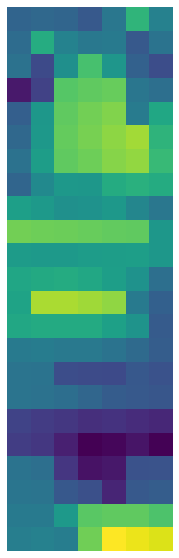

In [9]:
fig, axs = plt.subplots(figsize=(10, 10))

ax0 = axs.matshow(concentration_, cmap="OrRd", label="One Simulation")

ax0 = axs.matshow(out_matrix, cmap="OrRd", norm=mpl.colors.LogNorm())


ax3 = axs.matshow(concentration_, norm=mpl.colors.LogNorm())
# fig.colorbar(ax1, ax=ax3)
# fig.colorbar(ax1, ax=ax3[0][1])

plt.axis('off')
# plt.savefig('concentration_avg_')
# r = ax0.axs[0][1]

# fig.colorbar(ax2, ax=axs[1][0])
# fig.colorbar(ax3, ax=axs[1][1])

# fig.tight_layout(4, 1, figsize=(10, 10))

# initial_array

In [37]:
# BUS

# --> Airavata: implement ############# section ########## with user input instead of loop

# initialize: parameter loops

windows = ['up', 'down']
num_students = [56]
masks = [1]
num_sims = 100
trip_length = 30


# table output: % chance of >= 1 infection over 1 bus trip

out_array = [[], [], []]

bus_trip_array = []


out_matrix = np.array(np.zeros(shape=bus_flow_direction.shape))

for w in range(len(windows)):

    for n in range(len(num_students)):
        
        for m in range(len(masks)):
            if windows[w] == 'up': # effective ACH = 5 
                win_effect = 0.25
            if windows[w] == 'down': # effective ACH = 20 # estimated for bus w/ windows down @ speed
                win_effect = 1
            # conc is not averaged yet
            bus_trip, conc, avg_conc, chance_nonzero = bus_sim(windows[w], num_students[n], masks[m], num_sims, trip_length, flow_seating=bus_flow_pos)
            # this is an array of transmission % for each student on the trip
        
            # reference array
            out_array[m].append(chance_nonzero) # append value
            
            bus_trip_array.append(bus_trip)
            
            for y in range(len(avg_conc)):
                for x in range((len(avg_conc[0]))):
                    out_matrix[y][x] += (avg_conc[y][x]) / (len(windows) * len(num_students) * len(masks))
        
        
        
out_df = pd.DataFrame(out_array)
out_df.columns = ['WinDown56', 'WinUp56']
out_df.index = ['100%', '90%', '80%'] # mask wearing rate
sim_df = out_df.copy()




C:\Users\Bailey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Bailey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


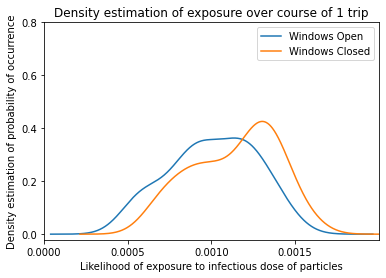

In [44]:

pd.Series(bus_trip_array[0]).plot.kde()
pd.Series(bus_trip_array[1]).plot.kde()
# pd.Series(bus_trip_array[2]).plot.kde()

# # pd.Series(bus_trip_array[3]).plot.kde()
# pd.Series(bus_trip_array[4]).plot.kde()
# pd.Series(bus_trip_array[5]).plot.kde()

ax = plt.gca()
plt.title('Density estimation of exposure over course of 1 trip')
plt.xlim(0, .002)
plt.xticks(np.arange(0, .002, .0005))

plt.yticks(np.arange(0, 3500, 700), np.arange(0, 3500, 700) / 3500)

# rescale y axis to be % based
plt.xlabel('Likelihood of exposure to infectious dose of particles')
plt.ylabel('Density estimation of probability of occurrence')
legend_array = ['Windows Open', 'Windows Closed']
# legend_array = ['Windows Down,56 Students Masks 100%', 'Windows Down,56 Students Masks 90%', 'Windows Down,56 Students Masks 80%',
#                'Windows Up,56 Students Masks 100%', 'Windows Up,56 Students Masks 90%', 'Windows Up,56 Students Masks 80%']
plt.legend(legend_array)
plt.savefig('window_curve.png', dpi=300)
# plt.legend(['Windows Down,56 Students,Masks = 100%', 'Windows Down,56 Students,Masks = 90%', 'Windows Down,56 Students, Masks = 80%'])

In [24]:
# plot windows :dONE:

In [25]:
# plot seating pattern diff


In [35]:
final_df = pd.DataFrame(out_array)
# col =['WinUp28', 'WinUp56', 'WinDown28', 'WinDown56']
# final_df.index = ['100%', '90%', '80%'] # mask wearing rate
final_df.columns = ['Windows Up', 'Windows Down']
final_df.index = ['Zigzag Seating', 'Window Seating', 'Full Occupancy']


def aply(elem):
    

    
out_df = final_df.apply(aply)
out_df

Windows Up      0.217944
Windows Down    0.171363
Name: Zigzag Seating, dtype: float64
1
Windows Up      0.311595
Windows Down    0.301111
Name: Window Seating, dtype: float64
1
Windows Up      0.383424
Windows Down    0.396158
Name: Full Occupancy, dtype: float64
1


Zigzag Seating    None
Window Seating    None
Full Occupancy    None
dtype: object

In [36]:
.396158 / .1713

2.312656158785756

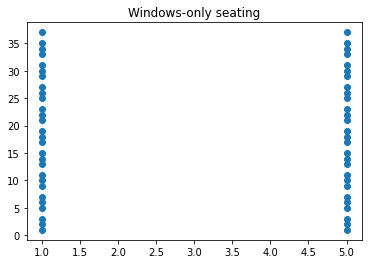

In [15]:

x_arr1 = []
y_arr1 = []
for i in bus_edge_pos.items():
    x_arr1.append(i[1][1])
    y_arr1.append(i[1][0])
plt.title('Windows-only seating')
plt.scatter(x=x_arr1, y=y_arr1)

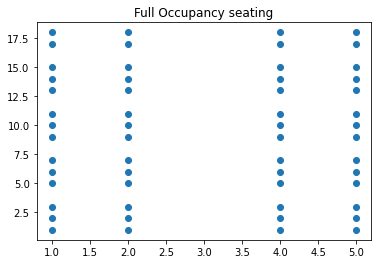

In [16]:

x_arr2 = []
y_arr2 = []
for i in bus_flow_pos.items():
    x_arr2.append(i[1][1])
    y_arr2.append(i[1][0])
plt.title('Full Occupancy seating')
plt.scatter(x=x_arr2, y=y_arr2)

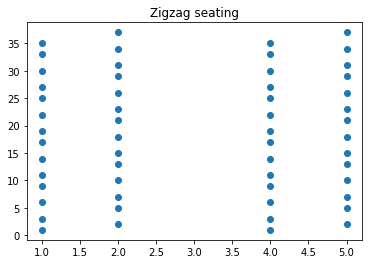

In [17]:


x_arr3 = []
y_arr3 = []
for i in bus_zig_pos.items():
    x_arr3.append(i[1][1])
    y_arr3.append(i[1][0])
plt.title('Zigzag seating')
plt.scatter(x=x_arr3, y=y_arr3)

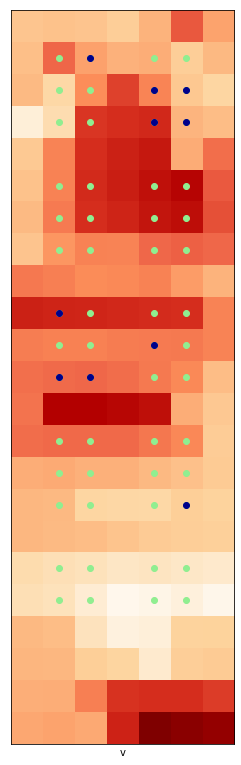

In [18]:

plt.matshow(concentration_, cmap="OrRd", norm=mpl.colors.LogNorm())
# inf_array = np.unique()

infected = np.unique(initial_array)

x_arr_conc = []
y_arr_conc = []
for i in infected:
#     if :
    v = bus_flow_pos[i]
    x_arr_conc.append(v[1])
    y_arr_conc.append(v[0])
          

plt.scatter(x_arr2, y_arr2, marker='o', c='lightgreen') 
plt.scatter(x_arr_conc, y_arr_conc, marker='o', c='darkblue')
plt.xlabel('v')
plt.xticks([])
plt.yticks([])
plt.savefig('concentration_seating_56_full.png', dpi=300)

In [19]:
# plot distribution of distances between individuals
front_idx = int(len(x_arr2) / 5) + 5
back_idx = int(len(x_arr2) / 3) * 2

([], [])

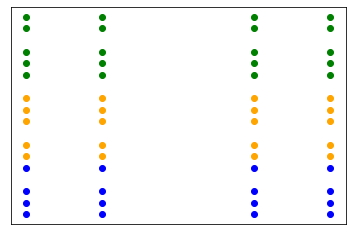

In [20]:
plt.scatter(x_arr2[:front_idx], y_arr2[:front_idx], marker='o', c='blue')
plt.scatter(x_arr2[front_idx:back_idx], y_arr2[front_idx:back_idx], marker='o', c='orange')
plt.scatter(x_arr2[back_idx:], y_arr2[back_idx:], marker='o', c='green')
plt.xticks([])
plt.yticks([])